# 定义参数

In [1]:
from generator import ctc_captcha_generator as gen
from generator import captcha_generator as gen_1
chars = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy"
width, height, n_len, n_class = 140, 44, 6, len(chars)

# 定义CTC Loss

In [2]:
from keras import backend as K

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

Using TensorFlow backend.


# 定义网格结构

In [3]:
from keras.models import *
from keras.layers import *
rnn_size = 128

input_tensor = Input((width, height, 3))
x = input_tensor
for i in range(3):
    x = Conv2D(32*2**i, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32*2**i, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)

conv_shape = x.get_shape()
x = Reshape(target_shape=(int(conv_shape[1]), int(conv_shape[2]*conv_shape[3])))(x)

x = Dense(32, activation='relu')(x)

gru_1 = GRU(rnn_size, return_sequences=True, init='he_normal', name='gru1')(x)
gru_1b = GRU(rnn_size, return_sequences=True, go_backwards=True, init='he_normal', name='gru1_b')(x)
gru1_merged = merge([gru_1, gru_1b], mode='sum')

gru_2 = GRU(rnn_size, return_sequences=True, init='he_normal', name='gru2')(gru1_merged)
gru_2b = GRU(rnn_size, return_sequences=True, go_backwards=True, init='he_normal', name='gru2_b')(gru1_merged)
x = merge([gru_2, gru_2b], mode='concat')
x = Dropout(0.25)(x)
x = Dense(n_class, init='he_normal', activation='softmax')(x)
base_model = Model(input=input_tensor, output=x)

labels = Input(name='the_labels', shape=[n_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([x, labels, input_length, label_length])

model = Model(input=[input_tensor, labels, input_length, label_length], output=[loss_out])
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer='adadelta')

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(128, return_sequences=True, kernel_initializer="he_normal", name="gru1")`
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(128, go_backwards=True, kernel_initializer="he_normal", name="gru1_b", return_sequences=True)`
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/legacy/layers.py:460: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main

In [4]:
int(conv_shape[1] - 2)

13

# 网络结构可视化

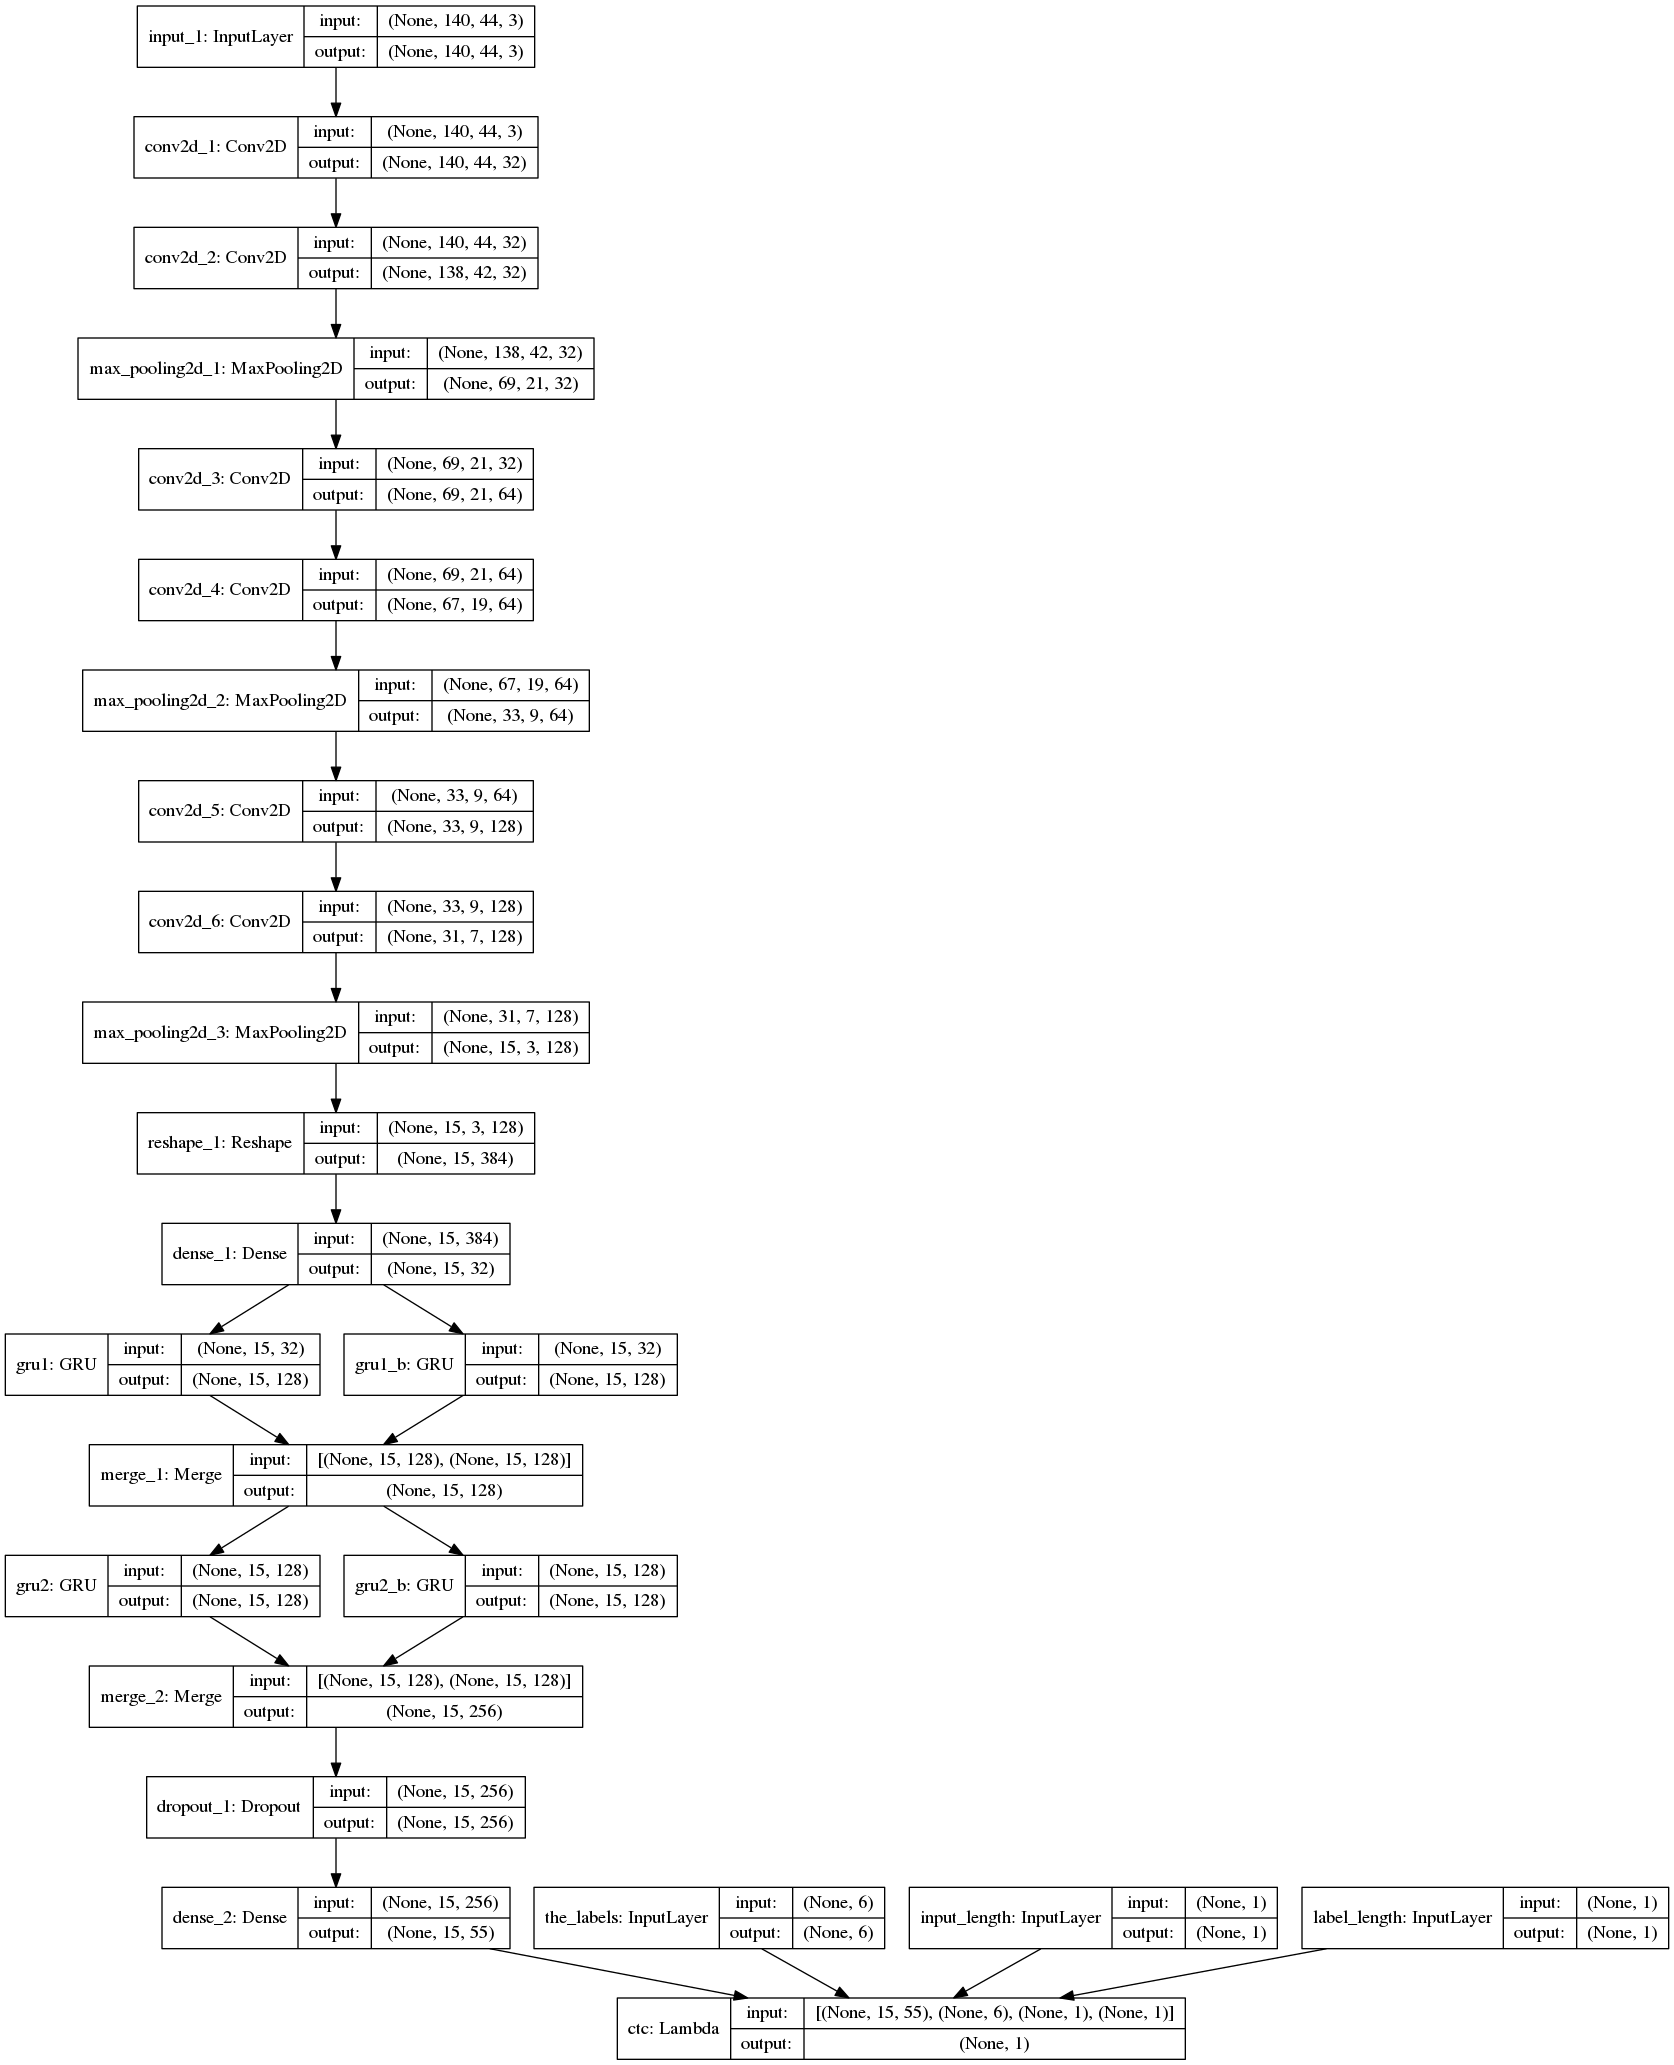

In [5]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file="ctc_model_v0.1.png", show_shapes=True)
Image('ctc_model_v0.1.png')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

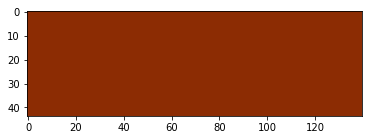

In [6]:
images = gen(width, height, 17)
[X_test, y_test, _, _], _  = next(images)
plt.imshow(X_test[0].transpose(1, 0, 2))
plt.show()

In [7]:
a = X_test[0]

In [8]:
a.shape

(140, 44, 3)

In [12]:
a[a[:, :]!=[140,  44,   3]]

array([], dtype=uint8)

In [ ]:
a = gen_1(width=width, height=height, batch_size=1)
X, y = a.next()
plt.imshow(X[0])
plt.show()

IndexError: list index out of range

> /home/ubuntu/anaconda2/lib/python2.7/random.py(275)choice()
    273     def choice(self, seq):
    274         """Choose a random element from a non-empty sequence."""
--> 275         return seq[int(self.random() * len(seq))]  # raises IndexError if seq is empty
    276 
    277     def shuffle(self, x, random=None):



In [8]:
print width
print height

140
44


In [9]:
%pdb

Automatic pdb calling has been turned ON


In [10]:
images = gen(width, height, 15)

In [11]:
images.next()

([array([[[[140,  44,   3],
           [140,  44,   3],
           [140,  44,   3],
           ..., 
           [140,  44,   3],
           [140,  44,   3],
           [140,  44,   3]],
  
          [[140,  44,   3],
           [140,  44,   3],
           [140,  44,   3],
           ..., 
           [140,  44,   3],
           [140,  44,   3],
           [140,  44,   3]],
  
          [[140,  44,   3],
           [140,  44,   3],
           [140,  44,   3],
           ..., 
           [140,  44,   3],
           [140,  44,   3],
           [140,  44,   3]],
  
          ..., 
          [[140,  44,   3],
           [140,  44,   3],
           [140,  44,   3],
           ..., 
           [140,  44,   3],
           [140,  44,   3],
           [140,  44,   3]],
  
          [[140,  44,   3],
           [140,  44,   3],
           [140,  44,   3],
           ..., 
           [140,  44,   3],
           [140,  44,   3],
           [140,  44,   3]],
  
          [[140,  44,   3],
           